# Introduction

In this lab, we will learn how to plot class probabilities calculated by the VotingClassifier in Scikit-Learn. We will use three different classifiers, including LogisticRegression, GaussianNB, and RandomForestClassifier, and average their predicted probabilities using the VotingClassifier. We will then visualize the probability weighting by fitting each classifier on the training set and plot the predicted class probabilities for the first sample in the dataset.

# Initialize the Classifiers and the Dataset

We will first initialize three classifiers and a toy dataset. We will use LogisticRegression, GaussianNB, and RandomForestClassifier as the classifiers, and X and y as the toy dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression(max_iter=1000, random_state=123)
clf2 = RandomForestClassifier(n_estimators=100, random_state=123)
clf3 = GaussianNB()
X = np.array([[-1.0, -1.0], [-1.2, -1.4], [-3.4, -2.2], [1.1, 1.2]])
y = np.array([1, 1, 2, 2])

# Initialize the VotingClassifier

We will then initialize a soft-voting VotingClassifier with weights **[1, 1, 5]**, which means that the predicted probabilities of the RandomForestClassifier count 5 times as much as the weights of the other classifiers when the averaged probability is calculated.

In [2]:
eclf = VotingClassifier(
    estimators=[("lr", clf1), ("rf", clf2), ("gnb", clf3)],
    voting="soft",
    weights=[1, 1, 5],
)

# Predict Class Probabilities for all Classifiers

We will predict the class probabilities for all classifiers using the predict_proba() function.

In [3]:
probas = [c.fit(X, y).predict_proba(X) for c in (clf1, clf2, clf3, eclf)]

# Get Class Probabilities for the First Sample in the Dataset

We will get the class probabilities for the first sample in the dataset and store them in class1_1 and class2_1.

In [4]:
class1_1 = [pr[0, 0] for pr in probas]
class2_1 = [pr[0, 1] for pr in probas]

# Plot the Class Probabilities

We will plot the class probabilities for each classifier and the VotingClassifier using a bar plot.

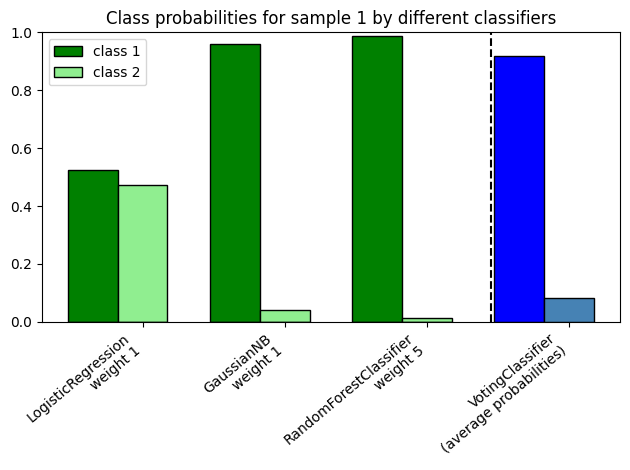

In [5]:
N = 4  # number of groups
ind = np.arange(N)  # group positions
width = 0.35  # bar width

fig, ax = plt.subplots()

# bars for classifier 1-3
p1 = ax.bar(ind, np.hstack(([class1_1[:-1], [0]])), width, color="green", edgecolor="k")
p2 = ax.bar(
    ind + width,
    np.hstack(([class2_1[:-1], [0]])),
    width,
    color="lightgreen",
    edgecolor="k",
)

# bars for VotingClassifier
p3 = ax.bar(ind, [0, 0, 0, class1_1[-1]], width, color="blue", edgecolor="k")
p4 = ax.bar(
    ind + width, [0, 0, 0, class2_1[-1]], width, color="steelblue", edgecolor="k"
)

# plot annotations
plt.axvline(2.8, color="k", linestyle="dashed")
ax.set_xticks(ind + width)
ax.set_xticklabels(
    [
        "LogisticRegression\nweight 1",
        "GaussianNB\nweight 1",
        "RandomForestClassifier\nweight 5",
        "VotingClassifier\n(average probabilities)",
    ],
    rotation=40,
    ha="right",
)
plt.ylim([0, 1])
plt.title("Class probabilities for sample 1 by different classifiers")
plt.legend([p1[0], p2[0]], ["class 1", "class 2"], loc="upper left")
plt.tight_layout()
plt.show()

# Summary

In this lab, we have learned how to plot class probabilities calculated by the VotingClassifier in Scikit-Learn. We have used three different classifiers, including LogisticRegression, GaussianNB, and RandomForestClassifier, and averaged their predicted probabilities using the VotingClassifier. We have then visualized the probability weighting by fitting each classifier on the training set and plot the predicted class probabilities for the first sample in the dataset.